In [1]:
import numpy as np
import scipy.ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import time

from IPython import display

from workflow.simulate_waves.simulate_2Dmaterials.flake import Flake
from ase.visualize import view
from ase.visualize.plot import plot_atoms

from abtem import __version__
print('AbTEM version:',__version__)
from abtem import *

AbTEM version: 1.0.0beta32


In [7]:
from ase.io import read

testset = 'Au_fcc_CeO2_MTF1_22112022'

fn = '/home/niflheim2/mhlla/hrid/simulation_data/' + testset # See README.md - this path will be ../simulation_data
# example 1
# atoms = read(fn + '/model/model_0001.cfg')
# example 2
# atoms = read(fn + '/model/model_0002.cfg')
# example 3
atoms = read(fn + '/model/model_0003.cfg')

In [8]:
from ase.io import write
import os

system = atoms
# View used to start ag, and find desired viewing angle
# view(atoms)
rot = '0x,0y,0z'  # found using ag: 'view -> rotate'
# filename = 'AuCeO2_' + rot.replace(',','')
# filename = 'AuCeO2_1_' + rot.replace(',','')
filename = 'AuCeO2_2_' + rot.replace(',','')


# Textures
N = len(system)
tex = ['ase3', ] * N

# Common kwargs for eps, png, pov
generic_projection_settings = {
    'rotation': rot,  # text string with rotation (default='' )
    'radii': .72,  # float, or a list with one float per atom
    'colors': None,  # List: one (r, g, b) tuple per atom
    'show_unit_cell': 2,   # 0, 1, or 2 to not show, show, and show all of cell
}

# Extra kwargs only available for povray (All units in angstrom)
povray_settings = {
    'display': False,  # Display while rendering
    'pause': False,  # Pause when done rendering (only if display)
    'transparent': False,  # Transparent background
    'canvas_width': None,  # Width of canvas in pixels
    'canvas_height': None,  # Height of canvas in pixels
    'camera_dist': 100.,  # Distance from camera to front atom
    'camera_type': 'orthographic',  # perspective, ultra_wide_angle
    'point_lights': [[(-30., 30., 500.), 'Blue']], # [[loc1, color1], [loc2, color2],...]
    'area_light': [(-30., 30., 500.), 'White', .7, .7, 1, 1],
    'background': 'White',        # color
    'textures': tex,  # Length of atoms list of texture names
    'celllinewidth': 0.1,  # Radius of the cylinders representing the cell
}

# Write the .pov (and .ini) file.
# comment out render not call the povray executable
renderer = write(f'{filename}.pov', system,
                 **generic_projection_settings,
                 povray_settings=povray_settings)

os.system(f'sed --in-place -e "s/640/4096/g" {filename}.ini')
os.system(f'povray {filename}.ini')

32512

In [9]:
import glob

image_parameters_file = fn + '/parameters.json'
image_label_files = sorted(glob.glob(fn + '/images_labels/*.npz'))
tem_parameters_files = sorted(glob.glob(fn + '/tem_params/*'))

In [10]:
len(image_label_files)

10000

In [11]:
from temnn.analysis.SimulatedAnalysis import Simulated_Data

simulated_data = Simulated_Data(image_label_files[4001],
                                image_parameters_file,
                                tem_parameters_files[4001])
simulated_data1 = Simulated_Data(image_label_files[4002],
                                image_parameters_file,
                                tem_parameters_files[4002])
simulated_data2 = Simulated_Data(image_label_files[4003],
                                image_parameters_file,
                                tem_parameters_files[4003])
simulated_data.load()
simulated_data1.load()
simulated_data2.load()

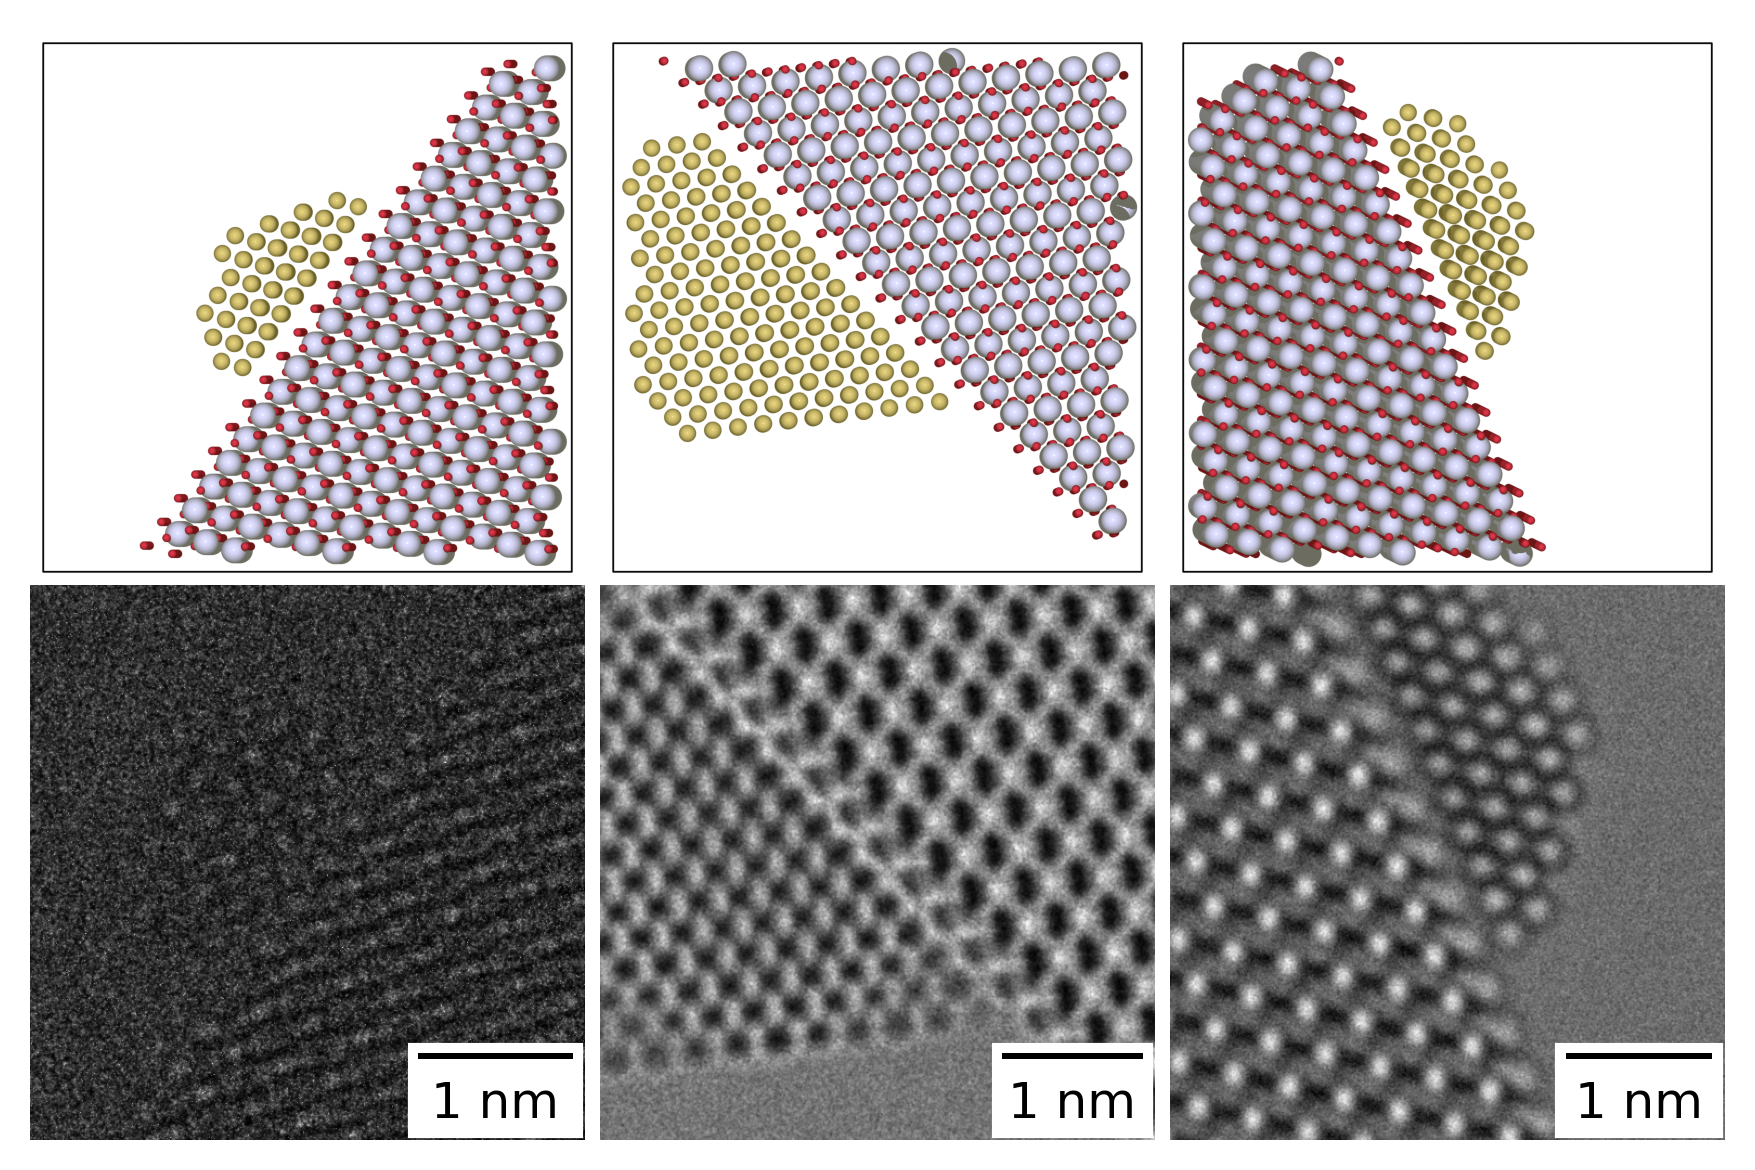

In [12]:
from matplotlib_scalebar.scalebar import ScaleBar

img1 = mpimg.imread('AuCeO2_0x0y0z.png')
img2 = mpimg.imread('AuCeO2_1_0x0y0z.png')
img3 = mpimg.imread('AuCeO2_2_0x0y0z.png')

fig, axs = plt.subplots(2,3)

axs[0,0].imshow(img1)
axs[0,1].imshow(img2)
axs[0,2].imshow(img3)

axs[1,0].imshow(simulated_data.image[:,:,0].T, origin='lower', cmap='gray')
axs[1,0].add_artist(ScaleBar(simulated_data.sampling*0.1,
                                     units='nm',
                                     length_fraction=0.3,
                                     color='k',
                                     frameon=True,
                                     location='lower right',
                                     font_properties={'size':12}))
axs[1,1].imshow(simulated_data1.image[:,:,0].T, origin='lower', cmap='gray')
axs[1,1].add_artist(ScaleBar(simulated_data1.sampling*0.1,
                                     units='nm',
                                     length_fraction=0.3,
                                     color='k',
                                     frameon=True,
                                     location='lower right',
                                     font_properties={'size':12}))
axs[1,2].imshow(simulated_data2.image[:,:,0].T, origin='lower', cmap='gray')
axs[1,2].add_artist(ScaleBar(simulated_data2.sampling*0.1,
                                     units='nm',
                                     length_fraction=0.3,
                                     color='k',
                                     frameon=True,
                                     location='lower right',
                                     font_properties={'size':12}))
for ax in axs[0]:
    ax.axis('off')
for ax in axs[1]:
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0,hspace=0)

plt.gcf().set_dpi(300)
#plt.savefig('FigureVisual.png')
plt.show()